# **1.Data Loading and Inspection**

# ***a)Load the required libraries***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ***b)Read excel file in python environment***

In [ ]:

data = pd.read_excel('/content/Electronic.xlsx')

In [ ]:
data.head()

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Store Rating,Loyalty Score,Membership Status,Preferred Visit Time
0,56,1,29.226195,47.077380,1.000000,1,Male,South,Accessories,UPI,149.252145,3.660461,3.597133,1.0,Evening
1,69,10,420.142612,7.985739,3.760294,1,Female,South,Accessories,Cash,1485.524222,3.551553,25.764903,1.0,Evening
2,46,4,127.742817,37.225718,1.771240,1,Male,East,Laptop,Credit Card,85.550131,3.922839,7.022399,1.0,Morning
3,32,9,417.722683,8.227732,1.926831,0,Female,East,Tablet,UPI,824.118724,3.860422,7.635412,1.0,Afternoon
4,60,13,608.031366,5.000000,3.902927,0,Female,South,Tablet,UPI,2463.590392,3.812820,29.461119,0.0,Morning


In [ ]:
dupe_data = data.copy()


In [ ]:
#BASIC INFORMATION OF DATA
dupe_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   5000 non-null   int64  
 1   Items Purchased       5000 non-null   int64  
 2   Total Spent           5000 non-null   float64
 3   Discount (%)          5000 non-null   float64
 4   Satisfaction Score    5000 non-null   float64
 5   Warranty Extension    5000 non-null   int64  
 6   Gender                4998 non-null   object 
 7   Region                5000 non-null   object 
 8   Product Category      5000 non-null   object 
 9   Payment Method        4996 non-null   object 
 10  Revenue               5000 non-null   float64
 11  Store Rating          4997 non-null   float64
 12  Loyalty Score         5000 non-null   float64
 13  Membership Status     4994 non-null   float64
 14  Preferred Visit Time  4992 non-null   object 
dtypes: float64(7), int64(

In [ ]:

#Shape of data
dupe_data.shape


(5000, 15)

In [ ]:
data_types = dupe_data.dtypes
print(data_types)

Age                       int64
Items Purchased           int64
Total Spent             float64
Discount (%)            float64
Satisfaction Score      float64
Warranty Extension        int64
Gender                   object
Region                   object
Product Category         object
Payment Method           object
Revenue                 float64
Store Rating            float64
Loyalty Score           float64
Membership Status       float64
Preferred Visit Time     object
dtype: object


In [ ]:

#Disaplay numerical details of all columns
dupe_data.describe()

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Revenue,Store Rating,Loyalty Score,Membership Status
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4997.000000,5000.000000,4994.000000
mean,43.584600,7.536600,243.721837,26.622330,2.650108,0.220400,717.998214,3.975184,15.638275,0.308370
std,14.919094,4.014858,154.949018,13.586725,1.533394,0.414558,776.789137,0.250691,9.144742,0.461867
min,18.000000,1.000000,15.105730,5.000000,1.000000,0.000000,-201.427094,3.076092,0.000000,0.000000
25%,31.000000,4.000000,119.130074,15.382663,1.000000,0.000000,164.697614,3.799761,7.944790,0.000000
50%,43.000000,7.000000,221.514206,27.848579,2.338884,0.000000,380.548500,3.969738,13.969791,0.000000
75%,56.000000,11.000000,346.173367,38.086993,4.129317,0.000000,1047.426498,4.149998,23.521601,1.000000
max,69.000000,14.000000,699.611576,48.489427,5.000000,1.000000,3523.469177,4.764298,39.235392,1.000000


In [ ]:
#Checking Null values
dupe_data.isna().sum()

,0
Age,0
Items Purchased,0
Total Spent,0
Discount (%),0
Satisfaction Score,0
Warranty Extension,0
Gender,2
Region,0
Product Category,0
Payment Method,4


# **2.Data Cleaning**


In [ ]:
#Handle missing values
# fillining gender details
dupe_data["Gender"].fillna("Not Available", inplace=True)

<ipython-input-10-5776e4535347>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dupe_data["Gender"].fillna("Not Available", inplace=True)


In [ ]:
##duplicates
dupe_data.duplicated().sum()##checking duplicate rows

0

In [ ]:
#Handle missing values
#Imputation

payment_method_mode = dupe_data['Payment Method'].mode().iloc[0]
preferred_visit_time_mode = dupe_data['Preferred Visit Time'].mode().iloc[0]
store_rating_mean = dupe_data['Store Rating'].mean()
membership_status_mean = dupe_data['Membership Status'].mean()

# fill the missing values

dupe_data['Payment Method'] = dupe_data['Payment Method'].fillna(payment_method_mode)
dupe_data['Preferred Visit Time'] = dupe_data['Preferred Visit Time'].fillna(preferred_visit_time_mode)
dupe_data['Store Rating'] = dupe_data['Store Rating'].fillna(store_rating_mean)
dupe_data['Membership Status'] = dupe_data['Membership Status'].fillna(membership_status_mean)




In [ ]:

# Round the values and then convert to integers
dupe_data['Satisfaction Score'] = dupe_data['Satisfaction Score'].round(2)
dupe_data['Store Rating'] = dupe_data['Store Rating'].round(2)
dupe_data['Loyalty Score'] = dupe_data['Loyalty Score'].round(2)

In [ ]:
dupe_data.isna().sum()

,0
Age,0
Items Purchased,0
Total Spent,0
Discount (%),0
Satisfaction Score,0
Warranty Extension,0
Gender,0
Region,0
Product Category,0
Payment Method,0


In [ ]:
dupe_data.head()

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Store Rating,Loyalty Score,Membership Status,Preferred Visit Time
0,56,1,29.226195,47.077380,1.00,1,Male,South,Accessories,UPI,149.252145,3.66,3.60,1.0,Evening
1,69,10,420.142612,7.985739,3.76,1,Female,South,Accessories,Cash,1485.524222,3.55,25.76,1.0,Evening
2,46,4,127.742817,37.225718,1.77,1,Male,East,Laptop,Credit Card,85.550131,3.92,7.02,1.0,Morning
3,32,9,417.722683,8.227732,1.93,0,Female,East,Tablet,UPI,824.118724,3.86,7.64,1.0,Afternoon
4,60,13,608.031366,5.000000,3.90,0,Female,South,Tablet,UPI,2463.590392,3.81,29.46,0.0,Morning


In [ ]:
# Find the number of unique values in column 'A'
unique_values_Loyalty_Score = dupe_data['Loyalty Score'].nunique()
print(f'Number of unique values in column Loyalty Score: {unique_values_Loyalty_Score}')

Number of unique values in column Loyalty Score: 2523


In [ ]:
# Find the number of unique values in column 'A'
unique_values_Satisfaction_Score = dupe_data['Satisfaction Score'].nunique()
print(f'Number of unique values in column Satisfaction Score: {unique_values_Satisfaction_Score}')

Number of unique values in column Satisfaction Score: 400


In [ ]:
dupe_data.head()

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Store Rating,Loyalty Score,Membership Status,Preferred Visit Time
0,56,1,29.226195,47.077380,1.00,1,Male,South,Accessories,UPI,149.252145,3.66,3.60,1.0,Evening
1,69,10,420.142612,7.985739,3.76,1,Female,South,Accessories,Cash,1485.524222,3.55,25.76,1.0,Evening
2,46,4,127.742817,37.225718,1.77,1,Male,East,Laptop,Credit Card,85.550131,3.92,7.02,1.0,Morning
3,32,9,417.722683,8.227732,1.93,0,Female,East,Tablet,UPI,824.118724,3.86,7.64,1.0,Afternoon
4,60,13,608.031366,5.000000,3.90,0,Female,South,Tablet,UPI,2463.590392,3.81,29.46,0.0,Morning


In [ ]:
#Standardize categorical values, such as region and product category
#Convert to Lowercase
dupe_data['Region'] = dupe_data['Region'].str.lower()
dupe_data['Product Category'] = dupe_data['Product Category'].str.lower()


In [ ]:
#Normalize numerical fields like "Total Spent" and "Discount (%)"

#standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


dupe_data['Total Spent'] = scaler.fit_transform(dupe_data[['Total Spent']])
dupe_data['Discount %'] = scaler.fit_transform(dupe_data[['Discount (%)']])


dupe_data.head()

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Store Rating,Loyalty Score,Membership Status,Preferred Visit Time,Discount %
0,56,1,-1.384437,47.077380,1.00,1,Male,south,accessories,UPI,149.252145,3.66,3.60,1.0,Evening,1.505668
1,69,10,1.138687,7.985739,3.76,1,Female,south,accessories,Cash,1485.524222,3.55,25.76,1.0,Evening,-1.371814
2,46,4,-0.748573,37.225718,1.77,1,Male,east,laptop,Credit Card,85.550131,3.92,7.02,1.0,Morning,0.780501
3,32,9,1.123068,8.227732,1.93,0,Female,east,tablet,UPI,824.118724,3.86,7.64,1.0,Afternoon,-1.354001
4,60,13,2.351393,5.000000,3.90,0,Female,south,tablet,UPI,2463.590392,3.81,29.46,0.0,Morning,-1.591590


# **3. Exploratory Data Analysis (EDA):**

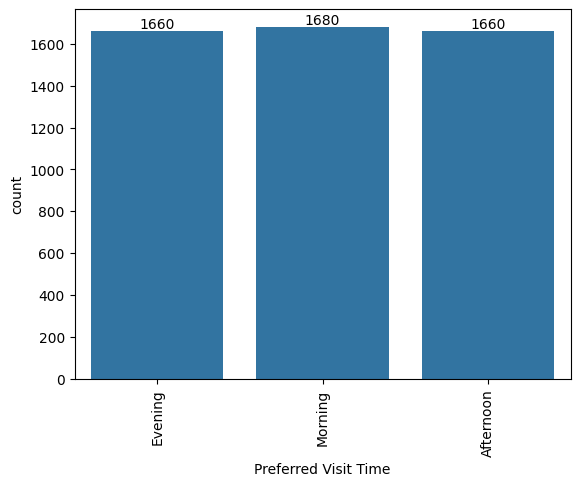

In [ ]:
#Univariate Analysis
# count of workers from different Timings
ax=sns.countplot(x=dupe_data['Preferred Visit Time'])
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

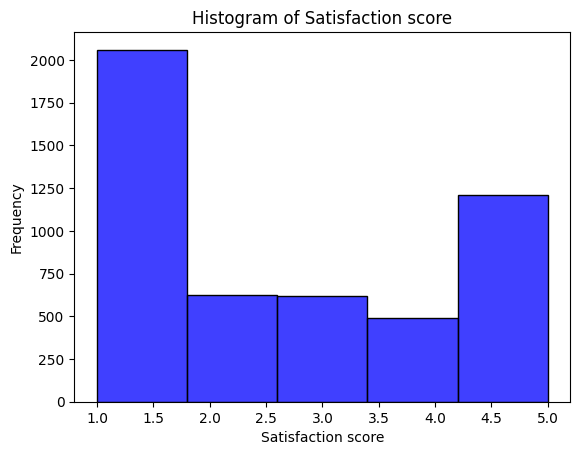

In [ ]:
# Create histogram using seaborn
sns.histplot(dupe_data['Satisfaction Score'], bins=5, kde=False, color='blue')

# Create histogram

# Add title and labels
plt.title('Histogram of Satisfaction score')
plt.xlabel('Satisfaction score')
plt.ylabel('Frequency')

# Show plot
plt.show()

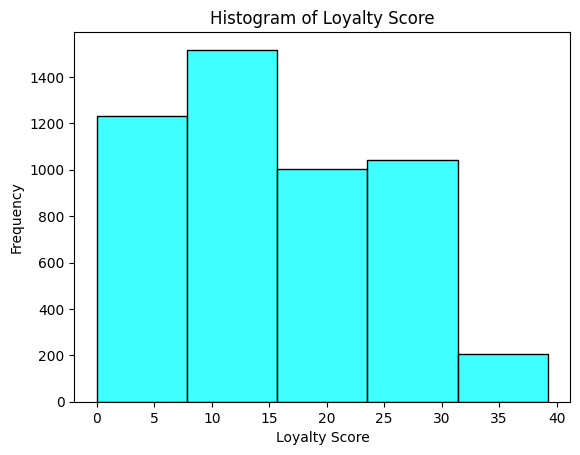

In [ ]:
# Create histogram using seaborn
sns.histplot(dupe_data['Loyalty Score'], bins=5, kde=False, color='cyan')

# Create histogram

# Add title and labels
plt.title('Histogram of Loyalty Score')
plt.xlabel('Loyalty Score')
plt.ylabel('Frequency')

# Show plot
plt.show()

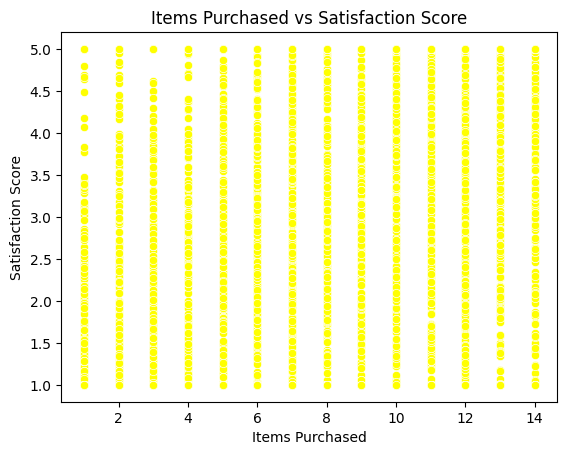

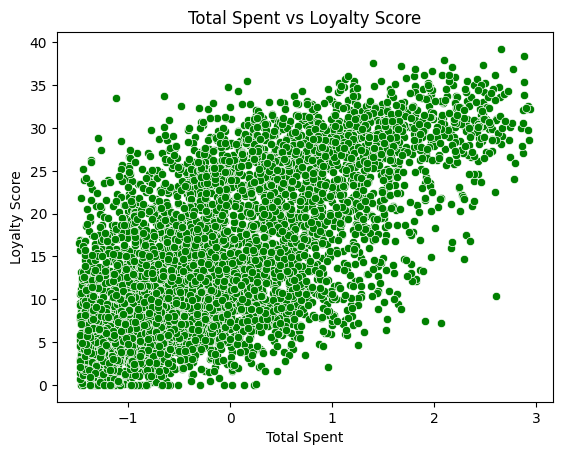

In [ ]:
#Scatter plot(relationship between two numerical variables)

# Scatter plot of Items Purchased vs Satisfaction Score
sns.scatterplot(data=dupe_data, x='Items Purchased', y='Satisfaction Score', color='yellow')
plt.title('Items Purchased vs Satisfaction Score')
plt.xlabel('Items Purchased')
plt.ylabel('Satisfaction Score')
plt.show()

# Scatter plot of Total Spent vs Loyalty Score
sns.scatterplot(data=dupe_data, x='Total Spent', y='Loyalty Score', color='green')
plt.title('Total Spent vs Loyalty Score')
plt.xlabel('Total Spent')
plt.ylabel('Loyalty Score')
plt.show()

In this first scatter plot case, the relationship between the two variables will be such that the regression line remains flat (i.e., it has a slope of approximately 0), indicating no correlation.

In this second scatter plot case,the clustered structure could imply that the variables are strongly related within each cluster but may differ across clusters. Understanding these relationships can help improve predictions and analyses.

In [ ]:


dupe_data.head()

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Store Rating,Loyalty Score,Membership Status,Preferred Visit Time,Discount %
0,56,1,-1.384437,47.077380,1.00,1,Male,south,accessories,UPI,149.252145,3.66,3.60,1.0,Evening,1.505668
1,69,10,1.138687,7.985739,3.76,1,Female,south,accessories,Cash,1485.524222,3.55,25.76,1.0,Evening,-1.371814
2,46,4,-0.748573,37.225718,1.77,1,Male,east,laptop,Credit Card,85.550131,3.92,7.02,1.0,Morning,0.780501
3,32,9,1.123068,8.227732,1.93,0,Female,east,tablet,UPI,824.118724,3.86,7.64,1.0,Afternoon,-1.354001
4,60,13,2.351393,5.000000,3.90,0,Female,south,tablet,UPI,2463.590392,3.81,29.46,0.0,Morning,-1.591590


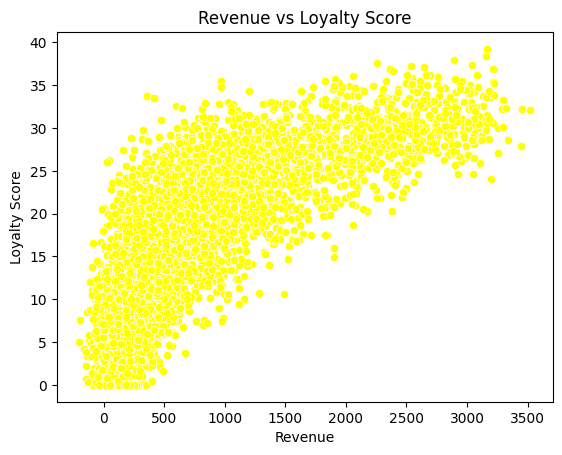

In [ ]:
#Scatter plot(relationship between two numerical variables)

# Scatter plot of Revenue vs Loyalty Score
sns.scatterplot(data=dupe_data, x='Revenue', y='Loyalty Score', color='yellow')
plt.title('Revenue vs Loyalty Score')
plt.xlabel('Revenue')
plt.ylabel('Loyalty Score')
plt.show()

As Revenue increases, Loyalty Score also increases.Strong correlation.

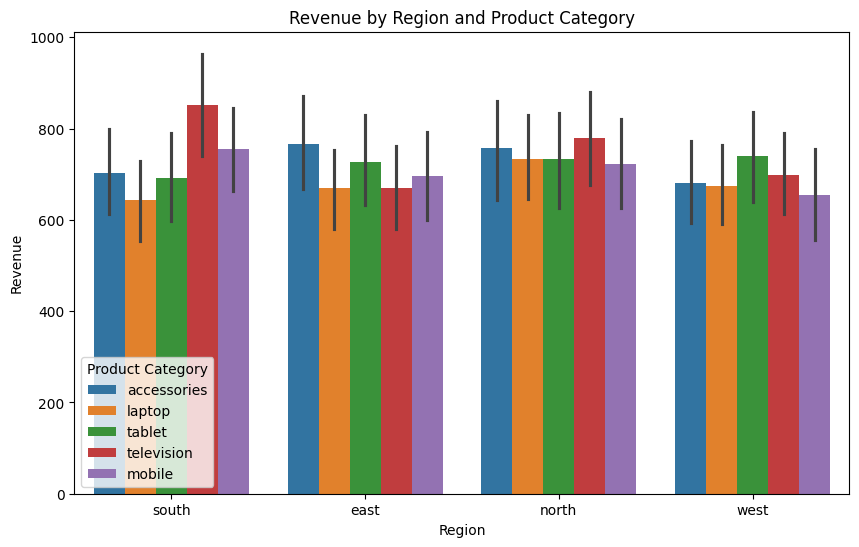

In [ ]:

# Bar plot for Revenue by Region and Product Category
plt.figure(figsize=(10, 6))
sns.barplot(data=dupe_data, x='Region', y='Revenue', hue='Product Category')
plt.title('Revenue by Region and Product Category')
plt.xlabel('Region')
plt.ylabel('Revenue')
plt.show()

#Here south regions are generating the most revenue for Television product category
#this helps in understanding regional preferences.

Kruskal-Wallis Test: Statistic = 2.142064012118152, p-value = 0.5434499102872794


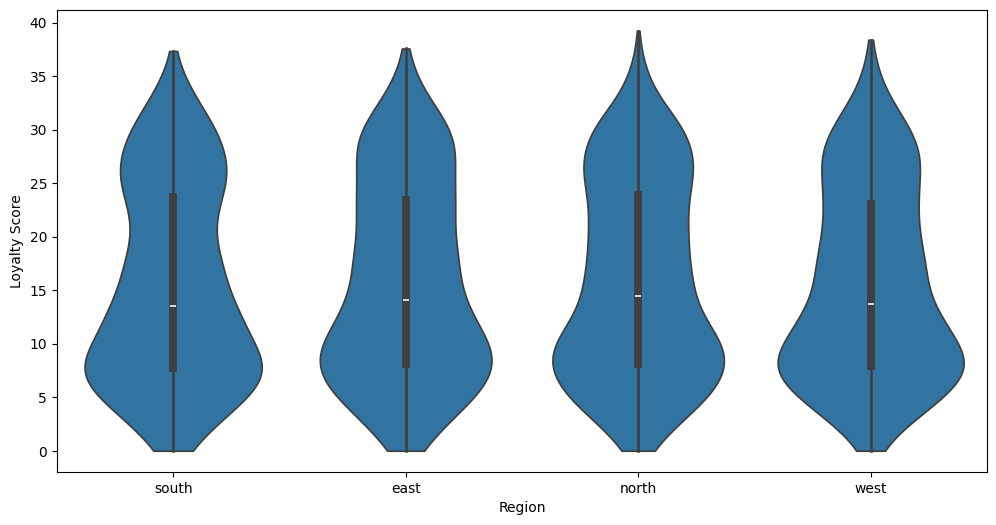

In [ ]:

# violin plot for understanding the relation ships btw "Region and Loyalty Score"

#  A higher value in Kruskal-Wallis Test indicates more significant difference.

from scipy.stats import kruskal


plt.figure(figsize=(12,6))
sns.violinplot(data=dupe_data, y="Loyalty Score", x = "Region", cut=0)

# Perform Kruskal-Wallis test
loyalty_by_Region = [dupe_data['Loyalty Score'][dupe_data['Region'] == region] for region in dupe_data['Region'].unique()]
kruskal_stat, p_value = kruskal(*loyalty_by_Region)

# Print the test result
print(f"Kruskal-Wallis Test: Statistic = {kruskal_stat}, p-value = {p_value}")
#low p-value indicates rejecting null hypothesis,accepting alternate hypothesis(features depends each other)



*  Since p-value greater than 0.5 ,the features are not significantly different from each other.
*  No significant correlation between Region and Loyalty Score.
*   Accepting null hypothesis.


Kruskal-Wallis Test: Statistic = 1.1427908863139797, p-value = 0.7667555083530397


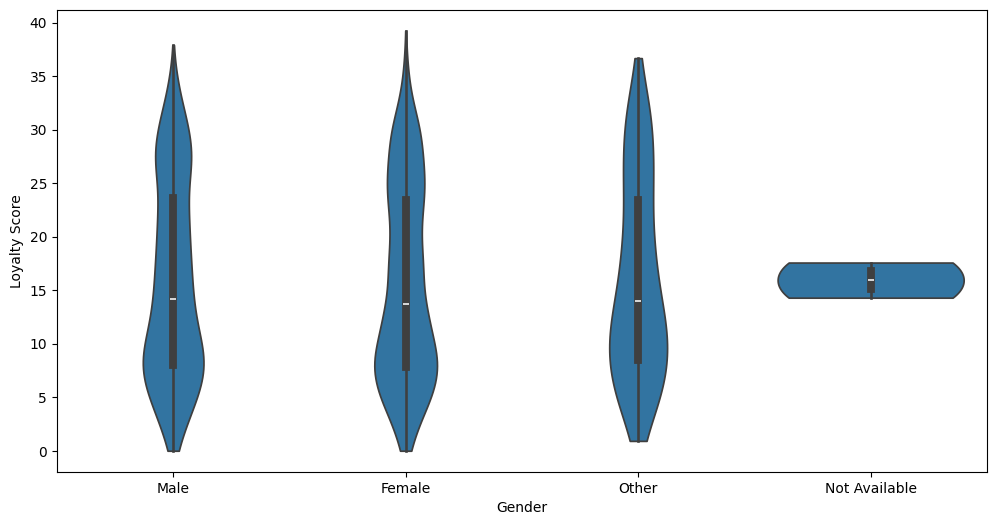

In [ ]:
# violin plot for understanding the relation ships btw "Gender and Loyalty Score"

#  A higher value in Kruskal-Wallis Test indicates more significant difference.

from scipy.stats import kruskal


plt.figure(figsize=(12,6))
sns.violinplot(data=dupe_data, y="Loyalty Score", x = "Gender", cut=0)

# Perform Kruskal-Wallis test
loyalty_by_Gender = [dupe_data['Loyalty Score'][dupe_data['Gender'] == gender] for gender in dupe_data['Gender'].unique()]
kruskal_stat, p_value = kruskal(*loyalty_by_Gender)

# Print the test result
print(f"Kruskal-Wallis Test: Statistic = {kruskal_stat}, p-value = {p_value}")
#low p-value indicates rejecting null hypothesis,accepting alternate hypothesis(features depends each other)

* Since p-value greater than 0.5 ,the features are not significantly different from each other.
* No significant correlation between Gender and Loyalty Score.
* Accepting null hypothesis.


Kruskal-Wallis Test: Statistic = 4.743273639451865, p-value = 0.3146675827917564


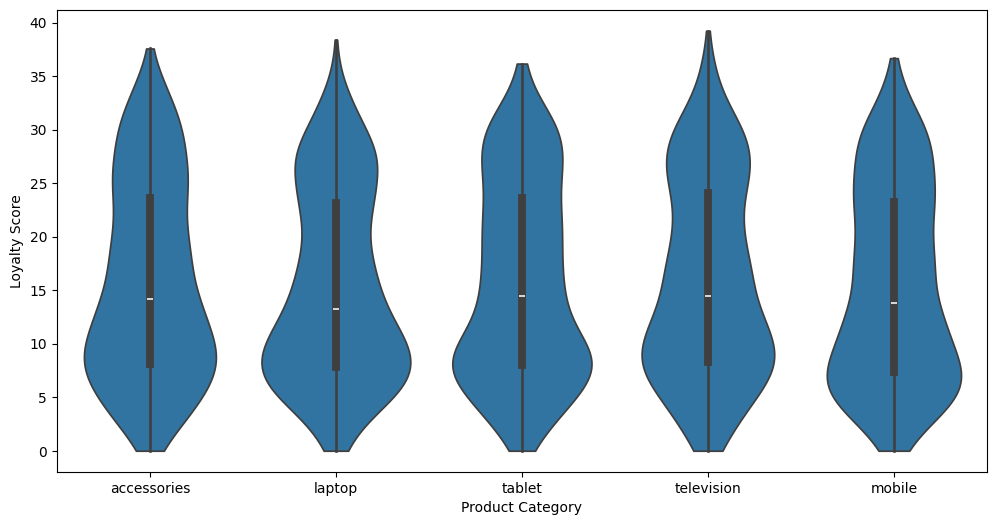

In [ ]:
# violin plot for understanding the relation ships btw "Product Category and Loyalty Score"

#  A higher value in Kruskal-Wallis Test indicates more significant difference.

from scipy.stats import kruskal


plt.figure(figsize=(12,6))
sns.violinplot(data=dupe_data, y="Loyalty Score", x = "Product Category", cut=0)

# Perform Kruskal-Wallis test
loyalty_by_product_category = [dupe_data['Loyalty Score'][dupe_data['Product Category'] == product_category] for product_category in dupe_data['Product Category'].unique()]
kruskal_stat, p_value = kruskal(*loyalty_by_product_category)

# Print the test result
print(f"Kruskal-Wallis Test: Statistic = {kruskal_stat}, p-value = {p_value}")
#low p-value indicates rejecting null hypothesis,accepting alternate hypothesis(features depends each other)


*   Since p-value less than than 0.5 ,the features are  significantly different from each other.
* Significant correlation between Product Category and Loyalty Score.
*   Rejecting null hypothesis.




Kruskal-Wallis Test: Statistic = 10.490703717214, p-value = 0.03292528503912362


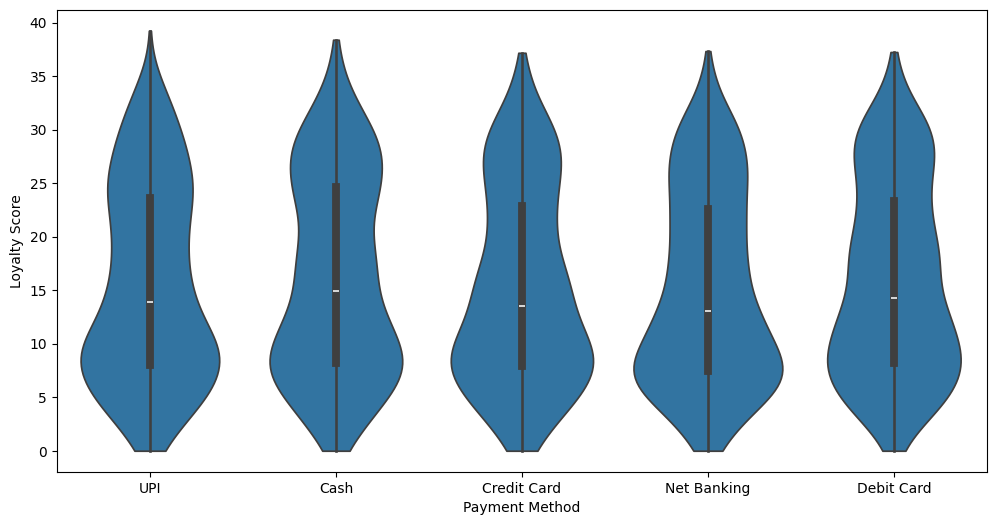

In [ ]:
# violin plot for understanding the relation ships btw "Payment Method" and Loyalty Score"

#  A higher value in Kruskal-Wallis Test indicates more significant difference.

from scipy.stats import kruskal


plt.figure(figsize=(12,6))
sns.violinplot(data=dupe_data, y="Loyalty Score", x = "Payment Method", cut=0)

# Perform Kruskal-Wallis test
loyalty_by_payment_method = [dupe_data['Loyalty Score'][dupe_data['Payment Method'] == payment_method] for payment_method in dupe_data['Payment Method'].unique()]
kruskal_stat, p_value = kruskal(*loyalty_by_payment_method)

# Print the test result
print(f"Kruskal-Wallis Test: Statistic = {kruskal_stat}, p-value = {p_value}")
#low p-value indicates rejecting null hypothesis,accepting alternate hypothesis(features depends each other)



*   Since p-value less than than 0.5 ,the features are significantly different from each other.
*  Significant correlation between Payment Method and Loyalty Score.
*  Rejecting null hypothesis.





Kruskal-Wallis Test: Statistic = 1.112590971095267, p-value = 0.5733290403986046


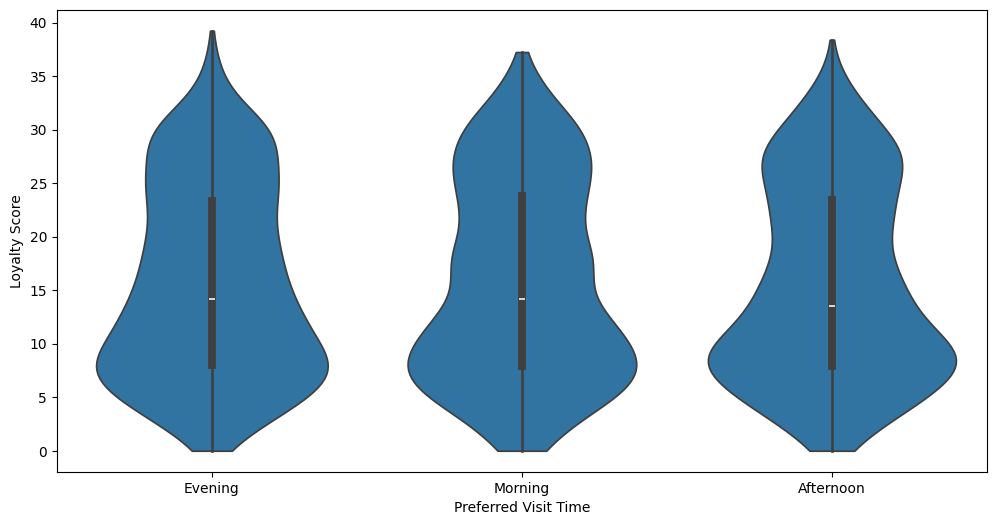

In [ ]:


# violin plot for understanding the relation ships btw "Payment Method" and Loyalty Score"

#  A higher value in Kruskal-Wallis Test indicates more significant difference.

from scipy.stats import kruskal



plt.figure(figsize=(12,6))
sns.violinplot(data=dupe_data, y="Loyalty Score", x = "Preferred Visit Time", cut=0)

# Perform Kruskal-Wallis test
loyalty_by_preferred_visit_time = [dupe_data['Loyalty Score'][dupe_data['Preferred Visit Time'] == preferred_visit_time] for preferred_visit_time in dupe_data['Preferred Visit Time'].unique()]
kruskal_stat, p_value = kruskal(*loyalty_by_preferred_visit_time)

# Print the test result
print(f"Kruskal-Wallis Test: Statistic = {kruskal_stat}, p-value = {p_value}")

#low p-value indicates rejecting null hypothesis,accepting alternate hypothesis(features depends each other)

*   Since p-value greater than 0.5 ,the features are not significantly different from each other.
*  No significant correlation between Preferred Visit Time and Loyalty Score.
*  Accepting Null hypothesis.




In [ ]:

columns = [

    'Age',
    'Items Purchased',
    'Total Spent',
    'Discount (%)',
    'Satisfaction Score',
    'Warranty Extension',
    'Revenue',
    'Store Rating',
    'Loyalty Score',
    'Membership Status',
    'Discount %'





]
data_selected = dupe_data[columns]

In [ ]:


#Correlation Matrix
corr_matrix = data_selected.corr()
corr_matrix

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Revenue,Store Rating,Loyalty Score,Membership Status,Discount %
Age,1.000000,-0.005522,-0.003212,0.000439,0.000292,-0.034065,-0.006344,-0.022746,0.009317,0.000911,0.000439
Items Purchased,-0.005522,1.000000,0.836032,-0.853837,0.494556,0.064381,0.674361,0.017571,0.557785,0.006671,-0.853837
Total Spent,-0.003212,0.836032,1.000000,-0.979015,0.597234,0.121439,0.882421,0.013689,0.669716,-0.000641,-0.979015
Discount (%),0.000439,-0.853837,-0.979015,1.000000,-0.589430,-0.086038,-0.829426,-0.013831,-0.659179,0.004502,1.000000
Satisfaction Score,0.000292,0.494556,0.597234,-0.589430,1.000000,0.062933,0.786226,0.010716,0.935090,0.026252,-0.589430
Warranty Extension,-0.034065,0.064381,0.121439,-0.086038,0.062933,1.000000,0.130036,0.016589,0.076038,0.010960,-0.086038
Revenue,-0.006344,0.674361,0.882421,-0.829426,0.786226,0.130036,1.000000,0.011042,0.808506,0.014835,-0.829426
Store Rating,-0.022746,0.017571,0.013689,-0.013831,0.010716,0.016589,0.011042,1.000000,0.007392,0.001259,-0.013831
Loyalty Score,0.009317,0.557785,0.669716,-0.659179,0.935090,0.076038,0.808506,0.007392,1.000000,0.020136,-0.659179
Membership Status,0.000911,0.006671,-0.000641,0.004502,0.026252,0.010960,0.014835,0.001259,0.020136,1.000000,0.004502


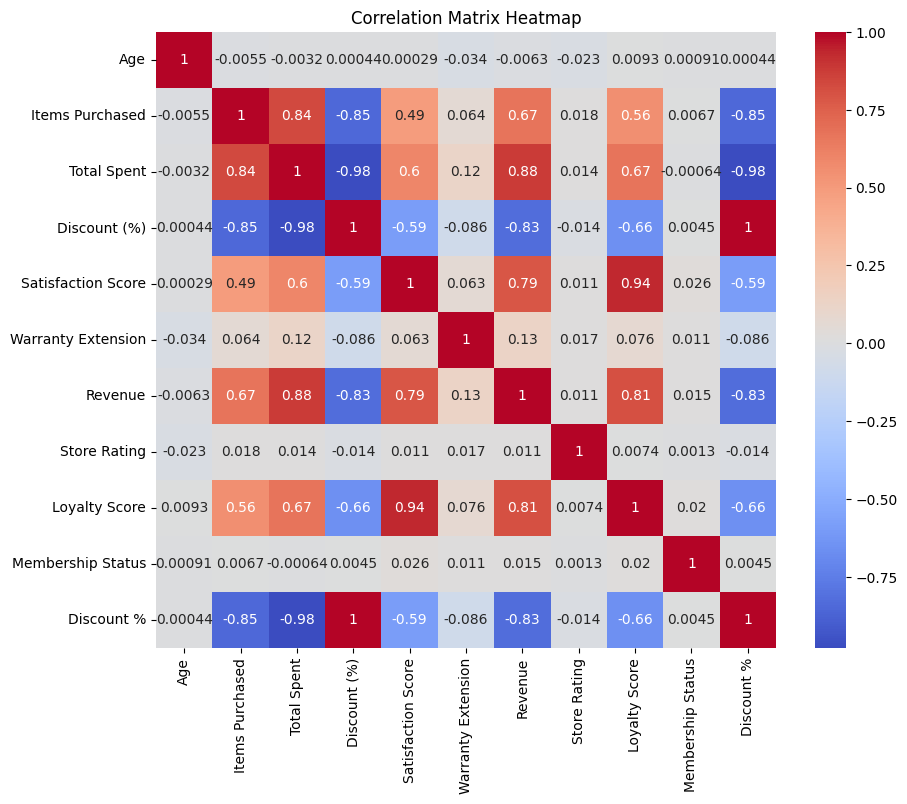

In [ ]:

#Heatmap of Correlation Matrix:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()



* From this heat map, Revenue ,Satisfaction Score and Total Spent are positively correlated with Loyalty Score.




*Inference: * Loaded the dataset.checked missing values.Filled missing values using imputation method.Standardized categorical values, such as region and product category.Normalized numerical fields like "Total Spent" and "Discount (%)". Using EDA(Exploratory Data Analysis),Analyzed the distribution of satisfaction scores, loyalty scores, and preferred visit times.

**key findings:**

violin plot:


*   It gives you an idea of how Revenue are spread across different regions.
If the "North" region has a wide distribution for "tablets," it may indicate a large variance in Revenue (some customers buying very little, others buying a lot).
*   High Revenue: Some customers in the North region may purchase multiple tablets at a high price point, leading to a significant increase in the revenue from these customers.

*    A higher value in Kruskal-Wallis Test indicates more significant difference.
*  In univariate analysis of count plot of "Prefered VisitTime" ,morning time is higher than other timings.

scatterplot(Total Spent vs Loyalty Score):

*   positive correlation(when Total Spent increases,Loyalty Score increases.)
*   means that people who spent more  tend to report higher loyalty.
*   points cluster together in certain areas of the plot (for example, a cluster of low "Total Spent" values with higher Loyalty scores), you might infer that some groups of customers tend to spent little but have more loyalty.

scatterplot(Items Purchased vs Satisfaction Score):

*   the points form a straight line , the relationship between "Items Purchased" and "Satisfaction Score" is linear.


heatmap of the correlation matrix:
*Loyalty Score and Satisfaction Score positively correleted highlt(0.95).











# **Week 2**

In [ ]:
dupe_data['Spent per Item'] =np.where(dupe_data['Items Purchased'] == 0, np.nan, dupe_data['Total Spent'] / dupe_data['Items Purchased'])

In [ ]:
dupe_data.head()

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Store Rating,Loyalty Score,Membership Status,Preferred Visit Time,Discount %,Spent per Item
0,56,1,-1.384437,47.077380,1.00,1,Male,south,accessories,UPI,149.252145,3.66,3.60,1.0,Evening,1.505668,-1.384437
1,69,10,1.138687,7.985739,3.76,1,Female,south,accessories,Cash,1485.524222,3.55,25.76,1.0,Evening,-1.371814,0.113869
2,46,4,-0.748573,37.225718,1.77,1,Male,east,laptop,Credit Card,85.550131,3.92,7.02,1.0,Morning,0.780501,-0.187143
3,32,9,1.123068,8.227732,1.93,0,Female,east,tablet,UPI,824.118724,3.86,7.64,1.0,Afternoon,-1.354001,0.124785
4,60,13,2.351393,5.000000,3.90,0,Female,south,tablet,UPI,2463.590392,3.81,29.46,0.0,Morning,-1.591590,0.180876


In [ ]:
#Normalize numerical fields like "Total Spent" and "Discount (%)"

#standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


dupe_data['Total Spent'] = scaler.fit_transform(dupe_data[['Total Spent']])
dupe_data['Discount %'] = scaler.fit_transform(dupe_data[['Discount (%)']])


dupe_data.head()


,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Store Rating,Loyalty Score,Membership Status,Preferred Visit Time,Discount %,Spent per Item
0,56,1,-1.384437,47.077380,1.00,1,Male,south,accessories,UPI,149.252145,3.66,3.60,1.0,Evening,1.505668,-1.384437
1,69,10,1.138687,7.985739,3.76,1,Female,south,accessories,Cash,1485.524222,3.55,25.76,1.0,Evening,-1.371814,0.113869
2,46,4,-0.748573,37.225718,1.77,1,Male,east,laptop,Credit Card,85.550131,3.92,7.02,1.0,Morning,0.780501,-0.187143
3,32,9,1.123068,8.227732,1.93,0,Female,east,tablet,UPI,824.118724,3.86,7.64,1.0,Afternoon,-1.354001,0.124785
4,60,13,2.351393,5.000000,3.90,0,Female,south,tablet,UPI,2463.590392,3.81,29.46,0.0,Morning,-1.591590,0.180876


# **Encoding**

In [ ]:
dupe_data.columns

Index(['Age', 'Items Purchased', 'Total Spent', 'Discount (%)',
       'Satisfaction Score', 'Warranty Extension', 'Gender', 'Region',
       'Product Category', 'Payment Method', 'Revenue', 'Store Rating',
       'Loyalty Score', 'Membership Status', 'Preferred Visit Time',
       'Discount %', 'Spent per Item'],
      dtype='object')

In [ ]:

dupe_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   5000 non-null   int64  
 1   Items Purchased       5000 non-null   int64  
 2   Total Spent           5000 non-null   float64
 3   Discount (%)          5000 non-null   float64
 4   Satisfaction Score    5000 non-null   float64
 5   Warranty Extension    5000 non-null   int64  
 6   Gender                5000 non-null   object 
 7   Region                5000 non-null   object 
 8   Product Category      5000 non-null   object 
 9   Payment Method        5000 non-null   object 
 10  Revenue               5000 non-null   float64
 11  Store Rating          5000 non-null   float64
 12  Loyalty Score         5000 non-null   float64
 13  Membership Status     5000 non-null   float64
 14  Preferred Visit Time  5000 non-null   object 
 15  Discount %           

In [ ]:
# label encoding

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
loyalty_features=dupe_data[["Revenue","Total Spent","Satisfaction Score","Loyalty Score"]]

In [ ]:
encode_values = loyalty_features.copy()

In [ ]:
# label encoding

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
# will be using for encoding new loyalty prediction
prediction_values = encode_values.copy()


# downloading prediction_values as csv file for flask
prediction_values.to_csv("/content/prediction_values.csv")


In [ ]:
prediction_values.head()

,Revenue,Total Spent,Satisfaction Score,Loyalty Score
0,149.252145,-1.384437,1.00,3.60
1,1485.524222,1.138687,3.76,25.76
2,85.550131,-0.748573,1.77,7.02
3,824.118724,1.123068,1.93,7.64
4,2463.590392,2.351393,3.90,29.46


In [ ]:




# downloading encoded values of prediction_values as csv file for scaling in flask
encode_values.to_csv("/content/tobe_scaled.csv")

In [ ]:

prediction_values.head()

,Revenue,Total Spent,Satisfaction Score,Loyalty Score
0,149.252145,-1.384437,1.00,3.60
1,1485.524222,1.138687,3.76,25.76
2,85.550131,-0.748573,1.77,7.02
3,824.118724,1.123068,1.93,7.64
4,2463.590392,2.351393,3.90,29.46


In [ ]:

encode_values

,Revenue,Total Spent,Satisfaction Score,Loyalty Score
0,149.252145,-1.384437,1.00,3.60
1,1485.524222,1.138687,3.76,25.76
2,85.550131,-0.748573,1.77,7.02
3,824.118724,1.123068,1.93,7.64
4,2463.590392,2.351393,3.90,29.46
...,...,...,...,...
4995,-64.457793,-1.317584,1.00,9.14
4996,138.772917,-0.459780,1.00,1.96
4997,1010.219124,1.611441,2.32,16.75
4998,1114.585926,0.106805,5.00,25.56


# **SCALING**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
x = encode_values.drop(columns="Loyalty Score")
y = encode_values["Loyalty Score"]
#y = y.reshape(-1,1)
x1 = x.copy()

x = scaler.fit_transform(x)
#y = scaler.fit_transform(y)

In [ ]:
##splitting
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=True)

# **Modelling**

In [ ]:


from sklearn.linear_model import LinearRegression


lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

# Make predictions
lr_predictions = lr_model.predict(x_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate R-squared (R²)
r2 = r2_score(y_test, lr_predictions)
print(f"R-squared (R²): {r2:.4f}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, lr_predictions)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, lr_predictions)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
#best model



R-squared (R²): 0.8934
Mean Absolute Error (MAE): 2.3816
Mean Squared Error (MSE): 8.7576
Root Mean Squared Error (RMSE): 2.9593


In [ ]:




from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Prepare data
x = encode_values.drop(columns="Loyalty Score")
y = encode_values[["Loyalty Score"]]

# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)


# Get feature importances from the trained model
importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importance_df)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              Feature  Importance
2  Satisfaction Score    0.890719
1         Total Spent    0.054759
0             Revenue    0.054522


In [ ]:








from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(x_test)

# Calculate R-squared (R²)
r2 = r2_score(y_test, rf_predictions)
print(f"R-squared (R²): {r2:.4f}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, rf_predictions)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, rf_predictions)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


R-squared (R²): 0.8718
Mean Absolute Error (MAE): 2.6093
Mean Squared Error (MSE): 10.5830
Root Mean Squared Error (RMSE): 3.2531


In [ ]:


from sklearn.ensemble import GradientBoostingRegressor

# Train a Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(x_train, y_train)

# Make predictions
gb_predictions = gb_model.predict(x_test)

# Make predictions
gb_predictions = gb_model.predict(x_test)

# Calculate R-squared (R²)
r2 = r2_score(y_test, gb_predictions)
print(f"R-squared (R²): {r2:.4f}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, gb_predictions)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, gb_predictions)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
#This ths the best model

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


R-squared (R²): 0.8906
Mean Absolute Error (MAE): 2.4084
Mean Squared Error (MSE): 9.0308
Root Mean Squared Error (RMSE): 3.0051


In [ ]:




# Get feature importances from the trained model
importances = gb_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)

              Feature  Importance
2  Satisfaction Score    0.958676
0             Revenue    0.024265
1         Total Spent    0.017059


In [ ]:


from sklearn.svm import SVR

# Train an SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(x_train, y_train)

# Make predictions
svr_predictions = svr_model.predict(x_test)

# Make predictions
svr_predictions = svr_model.predict(x_test)

# Calculate R-squared (R²)
r2 = r2_score(y_test, svr_predictions)
print(f"R-squared (R²): {r2:.4f}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, svr_predictions)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, svr_predictions)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R-squared (R²): 0.7217
Mean Absolute Error (MAE): 3.7454
Mean Squared Error (MSE): 22.9804
Root Mean Squared Error (RMSE): 4.7938


In [ ]:
import xgboost as xgb

# Train an XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(x_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(x_test)


# Calculate R-squared (R²)
r2 = r2_score(y_test, xgb_predictions)
print(f"R-squared (R²): {r2:.4f}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, xgb_predictions)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, xgb_predictions)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


R-squared (R²): 0.8782
Mean Absolute Error (MAE): 2.5336
Mean Squared Error (MSE): 10.0581
Root Mean Squared Error (RMSE): 3.1715


From this, it is clear that model using Linear regression is the best model.









In [ ]:
dupe_data.loc[37]

,37
Age,68
Items Purchased,13
Total Spent,0.124226
Discount (%),23.703136
Satisfaction Score,4.29
Warranty Extension,1
Gender,Male
Region,north
Product Category,accessories
Payment Method,Cash


In [ ]:



dupe_data.columns

Index(['Age', 'Items Purchased', 'Total Spent', 'Discount (%)',
       'Satisfaction Score', 'Warranty Extension', 'Gender', 'Region',
       'Product Category', 'Payment Method', 'Revenue', 'Store Rating',
       'Loyalty Score', 'Membership Status', 'Preferred Visit Time',
       'Discount %', 'Spent per Item'],
      dtype='object')

In [ ]:
prediction_values.head()

,Revenue,Total Spent,Satisfaction Score,Loyalty Score
0,149.252145,-1.384437,1.00,3.60
1,1485.524222,1.138687,3.76,25.76
2,85.550131,-0.748573,1.77,7.02
3,824.118724,1.123068,1.93,7.64
4,2463.590392,2.351393,3.90,29.46


In [ ]:
  # prediction  1

loyalty_prediction = {
    "Revenue": 1063.576628,
    "Total Spent":0.124226,
    "Satisfaction Score": 4.29




}


loyalty_predictdf = pd.DataFrame([loyalty_prediction])











scaler.fit_transform(x1)
loyalty_predict_scaled = scaler.transform(loyalty_predictdf)

In [ ]:
#original scaled data
x[37]

array([0.44492509, 0.12422623, 1.0695858 ])

In [ ]:

# scaled data for new loyalty prediction
loyalty_predict_scaled

array([[0.44492509, 0.124226  , 1.0695858 ]])

In [ ]:
prediction =lr_model.predict(loyalty_predict_scaled)

# Print the prediction
print("Predicted Result:", prediction[0])

Predicted Result: 23.953499148448337


In [ ]:
# pickle

import pickle

pickle.dump(lr_model,open('lr_newmodel.pkl','wb'))

In [ ]:
pickled_model = pickle.load(open('lr_newmodel.pkl','rb'))

pickled_model.predict(loyalty_predict_scaled)

array([23.95349915])

In [ ]:
# pkl files of label encoder and scalar

#label encoder
pickle.dump(encoder,open('l_encoder.pkl','wb'))

#scalar
pickle.dump(scaler,open('std_scalar.pkl','wb'))

# **Model Tuning:**

In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Define the Ridge Regression model
ridge = Ridge()

# Define the hyperparameter grid to search
param_grid = {
    'alpha': np.logspace(-6, 6, 13)  # Search for different values of alpha (regularization strength)
}

grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters found
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)



Fitting 5 folds for each of 13 candidates, totalling 65 fits
Best Hyperparameters: {'alpha': 0.1}


Cross-Validation MSE Scores: [8.45067517 9.11781601 8.59479501 9.75903107 8.57301535]
Average MSE from Cross-Validation: 8.899066522605438


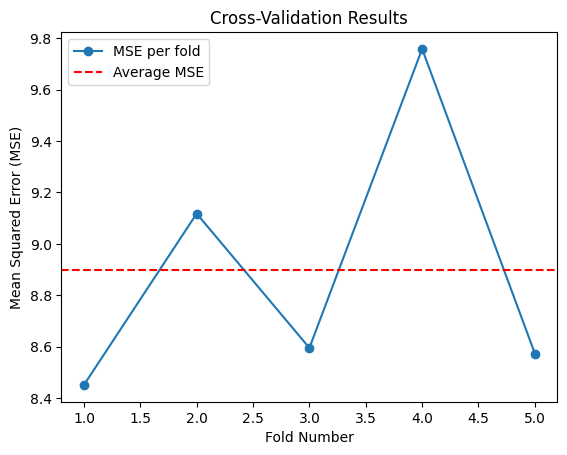

In [ ]:
#Cross validation
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(lr_model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
# Print cross-validation results
print("Cross-Validation MSE Scores:", -cv_scores)  # neg_mean_squared_error returns negative scores
print("Average MSE from Cross-Validation:", -cv_scores.mean())

# Visualize cross-validation results
plt.plot(range(1, 6), -cv_scores, marker='o', label="MSE per fold")
plt.axhline(y=-cv_scores.mean(), color='r', linestyle='--', label="Average MSE")
plt.title("Cross-Validation Results")
plt.xlabel("Fold Number")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.show()

The range of MSE scores (from 8.4 to 9.6) is relatively narrow, which suggests that the model is robust and performs similarly across different subsets of the data.